<a href="https://colab.research.google.com/github/SAMashiyane/ANN_Salary/blob/main/retinanet_r18_FPN_DropBlock_1x_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install MMDetection

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

%pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 33.1 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.0 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 37561, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 37561 (delta 49), reused 103 (delta 25), pack-reused 37399
Receiving objects: 100% (37561/37561), 62.96 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (25890/25890), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [3]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.8, V11.8.89
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.0.1+cu118
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;

## Perform Inference with An MMDet detector



In [4]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config retinanet_r18_fpn_1x_coco --dest ./checkpoints

processing retinanet_r18_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 MiB 29.7 MB/s eta 0:00:00
Successfully downloaded retinanet_r18_fpn_1x_coco_20220407_171055-614fd399.pth to /content/mmdetection/checkpoints
Successfully dumped retinanet_r18_fpn_1x_coco.py to /content/mmdetection/checkpoints


### Inference the detector

Since the model is successfully created and loaded, let's see how good it is. We use the high-level API `DetInferencer` implemented in the MMDetection. This API is created to ease the inference process. The details of the codes can be found [here](https://github.com/open-mmlab/mmdetection/blob/dev-3.x/mmdet/apis/det_inferencer.py).

In [5]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = 'retinanet_r18_fpn_1x_coco'
# Setup a checkpoint file to load
checkpoint = './checkpoints/retinanet_r18_fpn_1x_coco_20220407_171055-614fd399.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

In [6]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [13, 2, 2, 2, ... +96],
│   │   │   'scores': [0.876814603805542, 0.8224198222160339, 0.7888873219490051, 0.7760432362556458, ... +96],
│   │   │   'bboxes': [
│   │   │   │   [215.6107177734375, 175.97604370117188, 456.5303649902344, 383.0115051269531],
│   │   │   │   [295.3544006347656, 117.58948516845703, 379.0750732421875, 149.93194580078125],
│   │   │   │   [192.21612548828125, 110.29450988769531, 295.6172790527344, 155.395263671875],
│   │   │   │   [431.75494384765625, 105.73487091064453, 484.4620666503906, 131.98500061035156],
│   │   │   │   ... +96
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[ 28,  48,  13],
│   │   [ 37,  63,  28],
│   │   [ 30,  64,  27],
│   │   ...,
│   │   [ 23,  47,  31],
│   │   [ 31,  67,  31],
│   │   [ 54,  92,  17]],
│      
│      [[ 23,  42,   0],
│   │   [ 25,  50,   8],
│   │   [ 30,  62,  21],
│   │   ...,
│   │   [ 92, 114, 102],
│   │   [ 16,  53,  12],
│   │   [ 44,  75,  16]],
│      
│      [[ 20,  50,   0],
│   │   [ 25,  59,   8],
│   │   [ 29,  66,  23],
│   │   ...,
│   │   [ 47,  70,  44],
│   │   [ 29,  60,  18],
│   │   [ 54,  77,  31]],
│      
│      ...,
│      
│      [[ 63,  68,  45],
│   │   [ 58,  66,  27],
│   │   [ 74,  84,  49],
│   │   ...,
│   │   [ 32,  46,  23],
│   │   [ 56,  76,  39],
│   │   [ 31,  47,  18]],
│      
│      [[ 60,  66,  40],
│   │   [ 45,  55,  18],
│   │   [ 83,  92,  61],
│   │   ...,
│   │   [ 63,  77,  54],
│   │   [ 47,  67,  30],
│   │   [ 35,  52,  20]],
│      
│      [[ 64,  70,  42],
│   │   [ 85,  95,  60],
│   │   [ 66,  75,  48],
│   │   ...,
│   │   [ 37,  51,  28],
│   │   [ 59,  79,  42],
│   │   [ 44,  61,  29]]], dtype=uint8)
│   ]
}

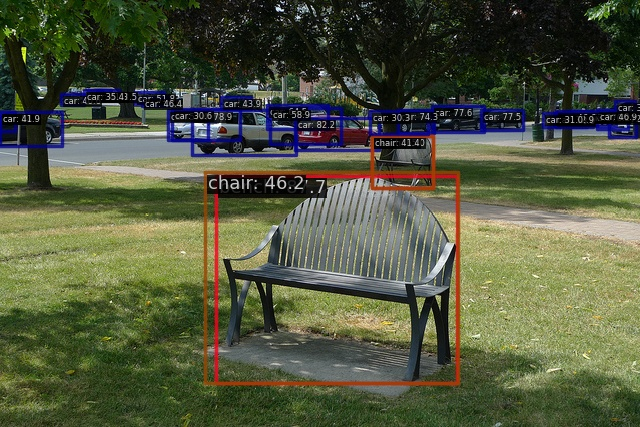

In [7]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

# Mount from Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
config_balloon = """
# Inherit and overwrite part of the config based on this config
_base_ = './retinanet_r18_fpn_1x_coco.py'

data_root = '/content/drive/MyDrive/Body_packer_Dataset/bodypacker333111/' # dataset root

train_batch_size_per_gpu = 4
train_num_workers = 2

max_epochs = 20
stage2_num_epochs = 1
base_lr = 0.00008


metainfo = {
    'classes': ('Body_packer', ),
    'palette': [
        (220, 20, 60),
    ]
}

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img='train/'),
        ann_file='train.json'))

val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img='val/'),
        ann_file='val.json'))

test_dataloader = val_dataloader

val_evaluator = dict(ann_file=data_root + 'val.json')

test_evaluator = val_evaluator



model = dict(bbox_head=dict(num_classes=1),
        neck=dict(
        type='FPN_DropBlock',
        plugin = dict(
                     type='DropBlock',
                     drop_prob=0.5,
                     block_size=3,
                     warmup_iters=0),
        ),
        )

# learning rate
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=10),
    dict(
        # use cosine lr from 10 to 20 epoch
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(640, 640),
        ratio_range=(0.1, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(640, 640)),
    dict(type='YOLOXHSVRandomAug'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(type='PackDetInputs')
]

# optimizer
optim_wrapper = dict(
    _delete_=True,
    type='OptimWrapper',
    optimizer=dict(type='AdamW', lr=base_lr, weight_decay=0.05),
    paramwise_cfg=dict(
        norm_decay_mult=0, bias_decay_mult=0, bypass_duplicate=True))

default_hooks = dict(
    checkpoint=dict(
        interval=5,
        max_keep_ckpts=2,  # only keep latest 2 checkpoints
        save_best='auto'
    ),
    logger=dict(type='LoggerHook', interval=5))

custom_hooks = [
    dict(
        type='PipelineSwitchHook',
        switch_epoch=max_epochs - stage2_num_epochs,
        switch_pipeline=train_pipeline_stage2)
]

# load COCO pre-trained weight
load_from = './checkpoints/retinanet_r18_fpn_1x_coco_20220407_171055-614fd399.pth'

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=max_epochs, val_interval=1)
visualizer = dict(vis_backends=[dict(type='LocalVisBackend'),dict(type='TensorboardVisBackend')])
"""

with open('./configs/retinanet/example_body_pack.py', 'w') as f:
    f.write(config_balloon)

In [12]:
!python tools/train.py configs/retinanet/example_body_pack.py

10/15 16:31:30 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 2087234083
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_5

### Understand the log
From the log, we can have a basic understanding on the training process and know how well the detector is trained.

First, since the dataset we are using is small, we loaded a pre-trained Faster R-CNN model and fine-tune it for detection.
The original Faster R-CNN is trained on COCO dataset that contains 80 classes but KITTI Tiny dataset only have 3 classes. Therefore, the last FC layers of the pre-trained Faster R-CNN for classification and regression have different weight shape and are not used.

Second, after training, the detector is evaluated by the default VOC-style evaluation. The results show that the detector achieves 58.1 mAP on the val dataset, not bad!

We can also check the tensorboard to see the curves.

In [ ]:
!kill 13757

In [ ]:
%load_ext tensorboard

# !rm -rf ./logs/ #to delete previous runs
%tensorboard --logdir ./work_dirs
# tensorboard = TensorBoard(log_dir="./work_dirs")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13959), started 0:08:00 ago. (Use '!kill 13959' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
# load tensorboard in colab
# %load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./work_dirs

RuntimeError: ignored